In [1]:
import tensorflow as tf  # for neural networks
import numpy as np  # for numerical operations
import tensorflow_probability as tfp  # for Bayesian neural networks
from tensorflow_probability import distributions as tfd  # for distributions
import matplotlib.pyplot as plt  # for plotting

2023-05-10 10:52:12.477183: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


How to compute the "score" of a model?

- The Kullback-Leibler (KL) divergence, also known as relative entropy, is a measure of the difference between two probability distributions.
- It is used to quantify how much one probability distribution differs from another, based on how the two distributions assign probabilities to the same set of events or outcomes.
- Specifically, the KL divergence measures the average difference between the logarithm of the probabilities assigned by the first distribution and the logarithm of the probabilities assigned by the second distribution.

In [2]:
# Define two probability distributions
p = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag=[1., 1.])
q = tfd.MultivariateNormalDiag(loc=[1., 1.], scale_diag=[2., 2.])

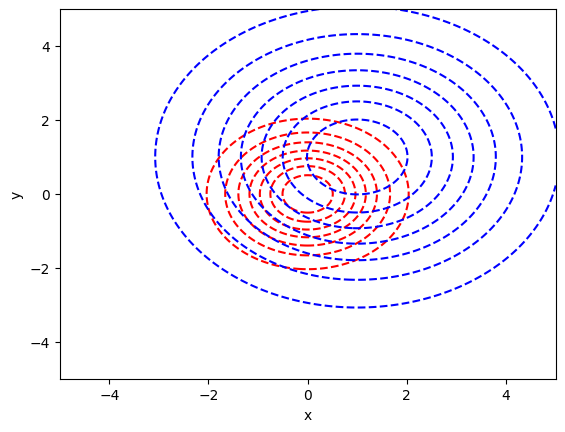

In [3]:
# Plot the probability densities of p and q
x = np.linspace(-5., 5., 1000)
y = np.linspace(-5., 5., 1000)
X, Y = np.meshgrid(x, y)
Z_p = p.prob(np.dstack((X, Y)))
Z_q = q.prob(np.dstack((X, Y)))
plt.contour(X, Y, Z_p, colors='red', linestyles='dashed')
plt.contour(X, Y, Z_q, colors='blue', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Evaluate the probability densities of p and q at some point x
x = [0., 0.]
p_x = p.prob(x)
q_x = q.prob(x)

In [5]:
# Compute the KL divergence between p and q
kl_divergence = tf.reduce_sum(p_x * tf.math.log(p_x / q_x))

print('KL divergence between p and q:', kl_divergence.numpy())

KL divergence between p and q: 0.26042435


In this example, we first define two multivariate normal distributions p and q with different mean and variance parameters. We then evaluate the probability densities of p and q at the point [0., 0.]. Finally, we compute the KL divergence between p and q using the formula KL(p || q) = sum(p(x) * log(p(x) / q(x))).

The output of this script should be the KL divergence between p and q, which measures how different the two distributions are from each other. You can experiment with different parameters for p and q to see how the KL divergence changes.

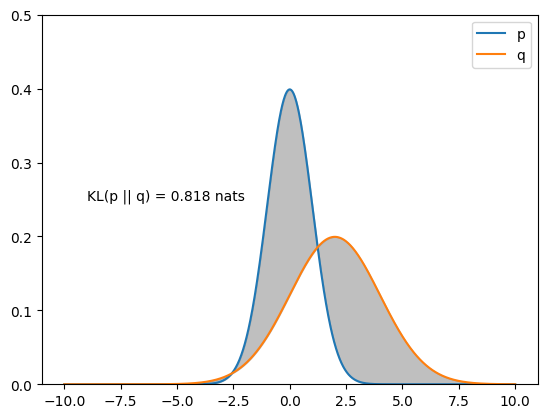

In [13]:
import numpy as np
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the initial mean and standard deviation for the two Gaussian distributions
mu1_init, sigma1_init = 0, 1
mu2_init, sigma2_init = 2, 2

# Define the domain of the distributions
x = np.linspace(-10.0, 10.0, 1000)

# Define the Gaussian distributions using TensorFlow Probability
p = tfp.distributions.Normal(mu1_init, sigma1_init)
q = tfp.distributions.Normal(mu2_init, sigma2_init)

# Define a function to update the distributions and the KL divergence based on the slider values
def update(mu1, sigma1, mu2, sigma2):
    p = tfp.distributions.Normal(mu1, sigma1)
    q = tfp.distributions.Normal(mu2, sigma2)
    kl_divergence = tfp.distributions.kl_divergence(p, q)
    plt.plot(x, p.prob(x), label='p')
    plt.plot(x, q.prob(x), label='q')
    plt.fill_between(x, p.prob(x), q.prob(x), color='grey', alpha=0.5)
    plt.text(-9, 0.25, "KL(p || q) = %.3f nats" % kl_divergence.numpy())
    plt.legend()
    plt.ylim(0, 0.5)
    plt.show()

# Create sliders for the mean and standard deviation of the two Gaussian distributions
mu1_slider = widgets.FloatSlider(value=mu1_init, min=-5.0, max=5.0, step=0.1, description='mu1:')
sigma1_slider = widgets.FloatSlider(value=sigma1_init, min=0.1, max=5.0, step=0.1, description='sigma1:')
mu2_slider = widgets.FloatSlider(value=mu2_init, min=-5.0, max=5.0, step=0.1, description='mu2:')
sigma2_slider = widgets.FloatSlider(value=sigma2_init, min=0.1, max=5.0, step=0.1, description='sigma2:')

# first call to update the plot
update(mu1_init, sigma1_init, mu2_init, sigma2_init)